## Purchase Analytic Predictive Analysis

In [64]:
## will customer by the product from a particular product category when they enter the shop

## TASK
## Use the statistic model to estimate the purchase probability for each customer.
## Calculate price elasricity of purchase probability under the different condition

## Logistic Regression method to classify the output probability between 0 and 1
## Eg.if get the value 0.77 it means that there is 77% chance of purchase
##    use with the classfy as well, suppose that the value is below 0.5 will classify as 0
##    or if the value large than 0.5 then it will classify as 1 means purchase




## Libraries

In [65]:
import numpy as np
import pandas as pd

# We import the sk learn modules we'll need to segment our new data. We'll need scaler, pca and k-means.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
# We import pickle in order to be able to load our pickled objects.
import pickle
# We import the Logistic Regression module from sk learn for the purchase probability model.
from sklearn.linear_model import LogisticRegression 
#We import the necessary libraries for visualization. We set seaborn do be our default.
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

## Data Preparation

In [66]:
#load data
df_purchase = pd.read_csv(r'C:\Users\ASUS\OneDrive\เดสก์ท็อป\python project\customer analytics dt365\purchase data.csv')

# Import Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Import PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Import K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Apply PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Segment data
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

# Create a copy of the data frame
df_purchase_predictors = df_purchase.copy()
# Add segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

In [67]:
df_pa.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size', 'Segment', 'Segment_0', 'Segment_1',
       'Segment_2', 'Segment_3'],
      dtype='object')

## Purchase Probability Model


#### choose the dependent and independent variable for the model

In [68]:
# Our Y is Incidence, as we want to predict the purchase probability for our customers
# or weather a purchase has happened based in the avg product price
Y = df_pa['Incidence']


In [69]:
## Predictors, weathe the customer purchase the product influenced by price
## Dependant variable is based on the average price of chocolate. 
# X is data frame, containing the mean price of each the 5 chocolate brands.

X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

## Logistic Regression 

 create a Logistic Regression model using sk learn. Then fit the model with X or price and Y or incidence.


In [70]:
## solvertechnique use for iteration optimizatioin problrm in Logistic regression
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [71]:
# coefficients of price show the relationship between price and purchase probability
model_purchase.coef_

array([[-2.34808664]])

we observe that the coefficient of price is negative meaning that the decrease in price wpuld lead to an increase in purchase probability

### Price Elasticity of Purchase Probability 
showinh the percentage change in quantity demanded of a product to the percentage change in price.

In [72]:
## observe prices of the 5 different brands, for determining purchase probability. 
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [73]:
price_range = np.arange(0.5,3.5,0.01)
price_range
## set thr price range with start from 0.5 to 3.5 with the increasing step of 0.01
# 300 values in total

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [74]:
df_price_range = pd.DataFrame(price_range)

# predict the purchase probability for our newly defined price range. 
# The result is a 2x300  array. The first column shows the probability for not purchasing the product, 
# the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [75]:
# obtain the class of probabilities for 0 (not purchase) and 1 (purchase)
Y_pr

array([[0.08208313, 0.91791687],
       [0.08386975, 0.91613025],
       [0.08569164, 0.91430836],
       [0.08754932, 0.91245068],
       [0.08944333, 0.91055667],
       [0.09137421, 0.90862579],
       [0.09334251, 0.90665749],
       [0.09534875, 0.90465125],
       [0.09739348, 0.90260652],
       [0.09947724, 0.90052276],
       [0.10160056, 0.89839944],
       [0.10376399, 0.89623601],
       [0.10596804, 0.89403196],
       [0.10821326, 0.89178674],
       [0.11050017, 0.88949983],
       [0.1128293 , 0.8871707 ],
       [0.11520116, 0.88479884],
       [0.11761627, 0.88238373],
       [0.12007515, 0.87992485],
       [0.12257828, 0.87742172],
       [0.12512618, 0.87487382],
       [0.12771933, 0.87228067],
       [0.13035821, 0.86964179],
       [0.1330433 , 0.8669567 ],
       [0.13577506, 0.86422494],
       [0.13855395, 0.86144605],
       [0.1413804 , 0.8586196 ],
       [0.14425487, 0.85574513],
       [0.14717775, 0.85282225],
       [0.15014947, 0.84985053],
       [0.

In [76]:
## taking only the second column of an array (purchase probability)
## notice that with the lower price we obtain the higher purchase probabilities
## while the higher price, the probability is drop
purchase_pr = Y_pr[:][:, 1]


In [77]:
## How does the demand for the product change with a given change in price (Price elasticity)
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)
pe

array([-0.09636915, -0.10043606, -0.10462993, -0.1089539 , -0.11341117,
       -0.11800501, -0.12273872, -0.12761566, -0.13263923, -0.1378129 ,
       -0.14314016, -0.14862457, -0.15426973, -0.16007929, -0.16605695,
       -0.17220643, -0.17853152, -0.18503604, -0.19172385, -0.19859885,
       -0.20566497, -0.21292619, -0.2203865 , -0.22804995, -0.23592058,
       -0.2440025 , -0.25229981, -0.26081665, -0.26955717, -0.27852553,
       -0.28772592, -0.29716253, -0.30683955, -0.31676119, -0.32693163,
       -0.33735508, -0.34803572, -0.35897773, -0.37018527, -0.38166247,
       -0.39341346, -0.4054423 , -0.41775307, -0.43034977, -0.44323638,
       -0.45641681, -0.46989495, -0.48367461, -0.49775953, -0.51215341,
       -0.52685986, -0.5418824 , -0.55722449, -0.57288948, -0.58888065,
       -0.60520115, -0.62185404, -0.63884228, -0.65616868, -0.67383596,
       -0.6918467 , -0.71020335, -0.7289082 , -0.74796343, -0.76737104,
       -0.7871329 , -0.8072507 , -0.82772598, -0.8485601 , -0.86

In [78]:
# Create price elasticities master data frame.
# contain all the elasticities in the purchase analytics part.
df_price_elasticities = pd.DataFrame(price_range)

In [79]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096369
1,0.51,-0.100436
2,0.52,-0.104630
3,0.53,-0.108954
4,0.54,-0.113411
...,...,...
295,3.45,-8.012987
296,3.46,-8.038237
297,3.47,-8.063453
298,3.48,-8.088636


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

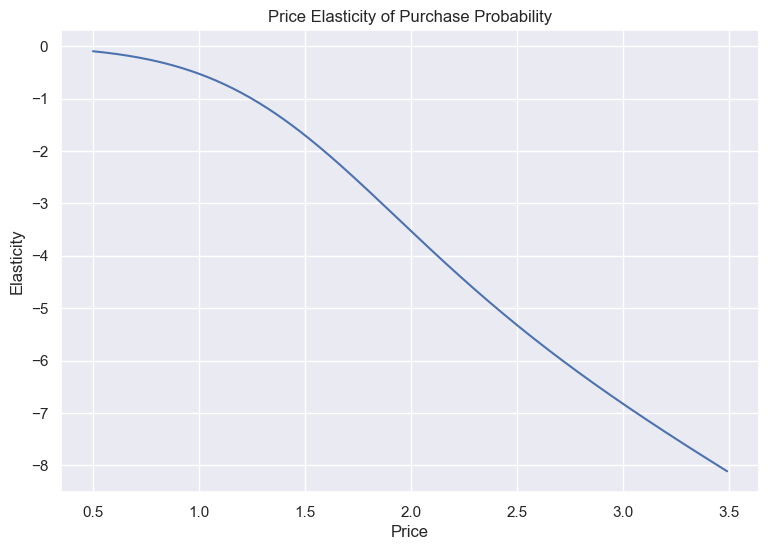

In [80]:
# Visualize the price elasticity of purchase probability of the average customer.
# To see the result how probabilities changes compare to the price.
# observe that the price elasticities are all negative. 
# Furthermore we can spot where the customer becomes inelastic.

plt.figure(figsize = (9, 6))
plt.plot(price_range, pe)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

the price increase the elasticoty decrease (negative coefficient), or it less likely for people to buy the higher price brand.

notice that the decrease in price range from 0.5 to 1.1 is not steep, and become steeper from 1.1 on ward 

what it means is that in the less steeper price range (inelastic) the brand can increase the product price as it wouldn't cause the significant change in purchase probability, 
on the other hand in the steeper price range, gaining the price will effect significantly on the purchase probabilities as the number show in the price point array the grater the price cause the higher decrese in purchase probbility.

from the geaph we can say theat with the price lower than 1.25 range, the product price can be increase without losing too much purchase probability.

from the price range that highrt than 1.25, reducing product price would gain more purchase probability. 


## Purchase Probability by Segments

explor the customer behaviour from different segment

#### Segment 1 - Career Focus 

In [81]:
df_pa.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


In [82]:
## filter the data to contain only customers from segment 1, the career-focused

df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]
df_pa_segment_1

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
370,200000005,7,0,0,0,0,0,1.59,1.88,2.01,...,49,1,121466,1,2,1,0,1,0,0
371,200000005,13,0,0,0,0,0,1.51,1.89,1.99,...,49,1,121466,1,2,1,0,1,0,0
372,200000005,20,0,0,0,0,0,1.52,1.89,1.99,...,49,1,121466,1,2,1,0,1,0,0
373,200000005,32,0,0,0,0,0,1.50,1.90,1.99,...,49,1,121466,1,2,1,0,1,0,0
374,200000005,39,0,0,0,0,0,1.50,1.90,1.99,...,49,1,121466,1,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57587,200000491,697,1,5,5,5,1,1.42,1.51,1.97,...,35,1,150237,2,2,1,0,1,0,0
57588,200000491,704,1,5,5,5,1,1.41,1.85,2.01,...,35,1,150237,2,2,1,0,1,0,0
57589,200000491,714,1,5,1,5,1,1.50,1.80,2.09,...,35,1,150237,2,2,1,0,1,0,0
57590,200000491,718,1,5,5,5,1,1.50,1.80,2.14,...,35,1,150237,2,2,1,0,1,0,0


In [83]:
##  predict the purchase probability
## set Y be the variable of incidence column. (purchase or not purchase)

Y = df_pa_segment_1['Incidence']
Y


370      0
371      0
372      0
373      0
374      0
        ..
57587    1
57588    1
57589    1
57590    1
57591    0
Name: Incidence, Length: 13580, dtype: int64

In [84]:
X = pd.DataFrame()

In [85]:
# recall the average price for purchases in segment 1. 
# the dependant variable contains the mean price of the brands.
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [86]:
X

,Mean_Price
370,2.046
371,2.028
372,2.030
373,2.030
374,2.030
...,...
57587,1.984
57588,2.060
57589,2.084
57590,2.086


In [87]:
# Fit logistic regression model (solver)
model_incidence_segment_1 = LogisticRegression(solver= 'sag')
model_incidence_segment_1.fit(X,Y)

LogisticRegression(solver='sag')

In [88]:
# observe that the price coefficient for the career focused segment
model_incidence_segment_1.coef_

array([[-1.71168388]])

the coefficient of this segment is lower than the avg customer, this menas that this segment is less price sensitive than the average customer 

In [89]:
# Calculate Price Elasticity of the career-focused segment.
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [90]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096369,-0.119093
1,0.51,-0.100436,-0.123276
2,0.52,-0.104630,-0.127553
3,0.53,-0.108954,-0.131923
4,0.54,-0.113411,-0.136391
...,...,...,...
295,3.45,-8.012987,-5.679978
296,3.46,-8.038237,-5.700133
297,3.47,-8.063453,-5.720251
298,3.48,-8.088636,-5.740333


In [132]:
#  see the turning point (inelasticity ) of segment 1 
df_price_elasticities[['Price_Point','PE_Segment_1']][(df_price_elasticities['PE_Segment_1'] > -1.2 ) &
                                                      ( df_price_elasticities['PE_Segment_1'] < -0.9 )]

,Price_Point,PE_Segment_1
83,1.33,-0.912706
84,1.34,-0.929014
85,1.35,-0.945494
86,1.36,-0.962145
87,1.37,-0.978967
88,1.38,-0.995959
89,1.39,-1.013120
90,1.40,-1.030450
91,1.41,-1.047948
92,1.42,-1.065612


the turning point would be at price range 1.39 when the price become inelastic

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

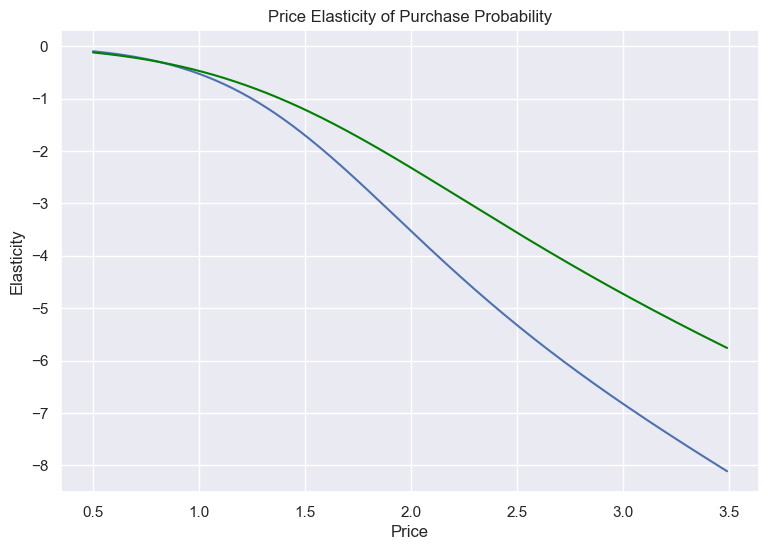

In [92]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_1, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

The two line lie very close together in the 0.5 to 1 price range, and from price range 1 onward the segment 1 is lie above the average customer

the turning point would be at price range 1.39 when the price become inelastic or incresing price in this range will cause the significantly to the purchase probability in the negative way.  

#### Segment 2 - Fewer Opputunities

In [93]:
# Select only customers from segment 2, the fewer-opportunities.
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [94]:
# Logistic regression model

##  predict the purchase probability
## set Y be the variable of incidence column. (purchase or not purchase)

Y = df_pa_segment_2['Incidence']
X = pd.DataFrame()
# Calculate average price for segment 2
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)

# Calculate price elasticities
model_incidence_segment2.coef_
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [98]:
df_price_elasticities['PE_Segment_2'] = pe_segment2
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2
0,0.50,-0.096369,-0.119093,-0.030928
1,0.51,-0.100436,-0.123276,-0.032695
2,0.52,-0.104630,-0.127553,-0.034548
3,0.53,-0.108954,-0.131923,-0.036492
4,0.54,-0.113411,-0.136391,-0.038531
...,...,...,...,...
295,3.45,-8.012987,-5.679978,-12.535053
296,3.46,-8.038237,-5.700133,-12.571953
297,3.47,-8.063453,-5.720251,-12.608836
298,3.48,-8.088636,-5.740333,-12.645702


In [133]:
#  see the turning point (inelasticity ) of segment 2 
df_price_elasticities[['Price_Point','PE_Segment_2']][(df_price_elasticities['PE_Segment_2'] > -1.2 ) &
                                                      ( df_price_elasticities['PE_Segment_2'] < -0.9 )]

,Price_Point,PE_Segment_2
74,1.24,-0.917568
75,1.25,-0.952062
76,1.26,-0.987574
77,1.27,-1.024116
78,1.28,-1.061702
79,1.29,-1.100344
80,1.30,-1.140054
81,1.31,-1.180840


the turning point would be at price range 1.27 when the price become inelastic

In [100]:
model_incidence_segment2.coef_

array([[-3.63793578]])

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

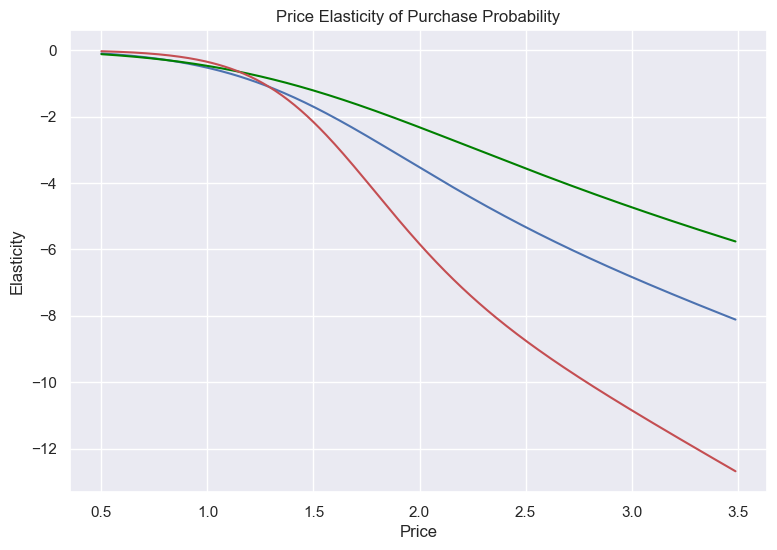

In [134]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### well-off segment

In [135]:
#### Segment 2 - Fewer Opputunities
# Select only customers from segment 2, the fewer-opportunities.
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

In [136]:
##  predict the purchase probability
## set Y be the variable of incidence column. (purchase or not purchase)

Y = df_pa_segment_3['Incidence']
X = pd.DataFrame()
# Calculate average price for segment 2
X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

In [137]:
# Logistic regression model


model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)

LogisticRegression(solver='sag')

In [138]:
# Calculate price elasticities
model_incidence_segment3.coef_
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range * ( 1- purchase_pr_segment3)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [139]:

df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096369,-0.119093,-0.030928,-0.167987
1,0.51,-0.100436,-0.123276,-0.032695,-0.172909
2,0.52,-0.104630,-0.127553,-0.034548,-0.177903
3,0.53,-0.108954,-0.131923,-0.036492,-0.182967
4,0.54,-0.113411,-0.136391,-0.038531,-0.188102
...,...,...,...,...,...
295,3.45,-8.012987,-5.679978,-12.535053,-4.021268
296,3.46,-8.038237,-5.700133,-12.571953,-4.036134
297,3.47,-8.063453,-5.720251,-12.608836,-4.050984
298,3.48,-8.088636,-5.740333,-12.645702,-4.065817


In [141]:
#  see the turning point (inelasticity ) of segment 2 
df_price_elasticities[['Price_Point','PE_Segment_3']][(df_price_elasticities['PE_Segment_3'] > -1.1) &
                                                      (df_price_elasticities['PE_Segment_3'] < -0.95)]

,Price_Point,PE_Segment_3
92,1.42,-0.950570
93,1.43,-0.962777
94,1.44,-0.975056
95,1.45,-0.987405
96,1.46,-0.999826
97,1.47,-1.012316
98,1.48,-1.024875
99,1.49,-1.037503
100,1.50,-1.050199
101,1.51,-1.062963


the turning point of the segment 3 (well-off segment) would be at price range 1.47 when the price become inelastic


In [145]:
model_incidence_segment3.coef_
## the less steepest among all segments

array([[-1.24561711]])

Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

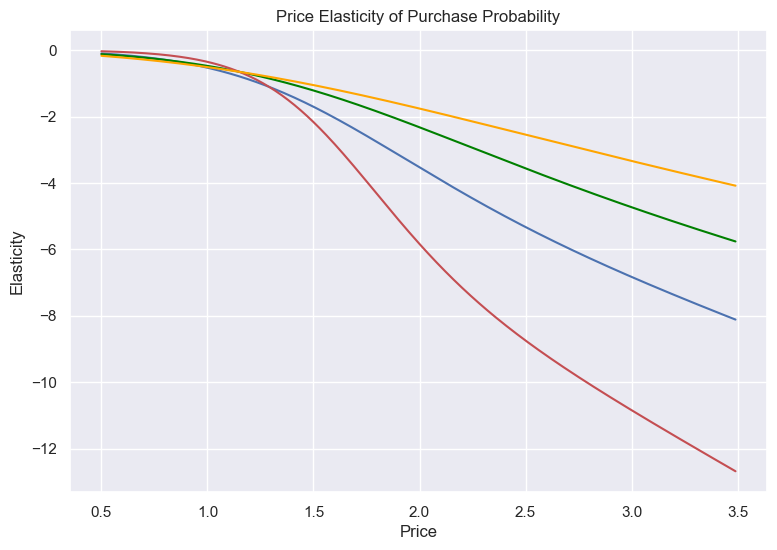

In [144]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Standard segment

In [146]:
# Select only customers from segment 0, the standard segment.
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]
# Prepare dependant and independant variables.
Y = df_pa_segment_0['Incidence']

X = pd.DataFrame()
# Calculate average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)

model_incidence_segment0.coef_
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [149]:
#  see the turning point (inelasticity ) of segment 2 
df_price_elasticities[['Price_Point','PE_Segment_0']][(df_price_elasticities['PE_Segment_0'] > -1.1) &
                                                      (df_price_elasticities['PE_Segment_0'] < -0.95)]

,Price_Point,PE_Segment_0
70,1.20,-0.955370
71,1.21,-0.970188
72,1.22,-0.985113
73,1.23,-1.000143
74,1.24,-1.015278
75,1.25,-1.030517
76,1.26,-1.045859
77,1.27,-1.061302
78,1.28,-1.076847
79,1.29,-1.092491


the turning point of the segment 0 (standdard segment) would be at price range 1.23 when the price become inelastic


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

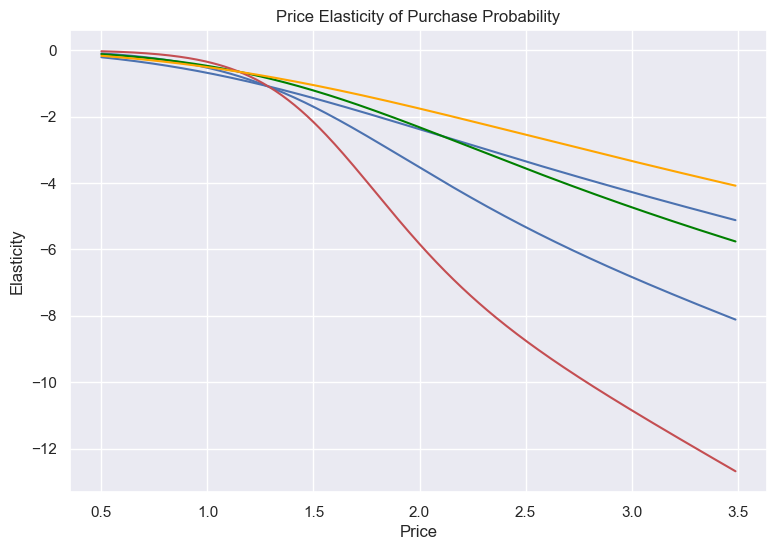

In [148]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe)
plt.plot(price_range, pe_segment0, color = 'b')
plt.plot(price_range, pe_segment_1, color = 'green')
plt.plot(price_range, pe_segment2, color = 'r')
plt.plot(price_range, pe_segment3, color = 'orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Purchase Probability with Promotion Feature

which customer segment will has a effect on the promotion lets explore

#### Data Preparation

In [150]:
Y = df_pa['Incidence']

In [152]:
X = pd.DataFrame()

In [153]:
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [154]:
# Calculate the average promotion rate across the 5 brands. 
# Add the mean price for the brands.
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()


,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


### Model Estimation

In [155]:
# Fit logistic regression model (solver)

model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)


LogisticRegression(solver='sag')

In [156]:
model_incidence_promotion.coef_

array([[-1.49396546,  0.56151975]])

the coefficient value are -1.49 for price and 0.56 for promotion
the cofficient of promotion is positive meaning that when the product are in promotion 
the customer tend to purchese more (increase in purchase in probability)

### Price Elastiscity for promotion

In [157]:
#create dataframe include A price and promotion feature for the model

df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})

In [158]:
df_price_elasticity_promotion

,Price_Range
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
...,...
295,3.45
296,3.46
297,3.47
298,3.48


add new column for price elasticity

In [159]:
df_price_elasticity_promotion['Promotion'] = 1

In [160]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [161]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [162]:
# Update master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096369,-0.211202,-0.119093,-0.030928,-0.167987,-0.125731
1,0.51,-0.100436,-0.217773,-0.123276,-0.032695,-0.172909,-0.129847
2,0.52,-0.104630,-0.224452,-0.127553,-0.034548,-0.177903,-0.134042
3,0.53,-0.108954,-0.231239,-0.131923,-0.036492,-0.182967,-0.138317
4,0.54,-0.113411,-0.238135,-0.136391,-0.038531,-0.188102,-0.142673
...,...,...,...,...,...,...,...
295,3.45,-8.012987,-5.051467,-5.679978,-12.535053,-4.021268,-4.861387
296,3.46,-8.038237,-5.068322,-5.700133,-12.571953,-4.036134,-4.879588
297,3.47,-8.063453,-5.085159,-5.720251,-12.608836,-4.050984,-4.897759
298,3.48,-8.088636,-5.101976,-5.740333,-12.645702,-4.065817,-4.915899


### Price Elasticity without Promotion

In [163]:
## Price Elasticity without Promotion
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [164]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [165]:
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)
no_promo = Y_no_promo[: , 1]
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Price_Range
- Promotion
Feature names seen at fit time, yet now missing:
- Mean_Price
- Mean_Promotion

  warnings.warn(message, FutureWarning)


In [167]:
# Update master data frame to include purchase probability elasticities without promotion.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0
0,0.50,-0.096369,-0.211202,-0.119093,-0.030928,-0.167987,-0.125731,-0.195642
1,0.51,-0.100436,-0.217773,-0.123276,-0.032695,-0.172909,-0.129847,-0.201763
2,0.52,-0.104630,-0.224452,-0.127553,-0.034548,-0.177903,-0.134042,-0.207986
3,0.53,-0.108954,-0.231239,-0.131923,-0.036492,-0.182967,-0.138317,-0.214313
4,0.54,-0.113411,-0.238135,-0.136391,-0.038531,-0.188102,-0.142673,-0.220744
...,...,...,...,...,...,...,...,...
295,3.45,-8.012987,-5.051467,-5.679978,-12.535053,-4.021268,-4.861387,-4.983010
296,3.46,-8.038237,-5.068322,-5.700133,-12.571953,-4.036134,-4.879588,-4.999916
297,3.47,-8.063453,-5.085159,-5.720251,-12.608836,-4.050984,-4.897759,-5.016802
298,3.48,-8.088636,-5.101976,-5.740333,-12.645702,-4.065817,-4.915899,-5.033668


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

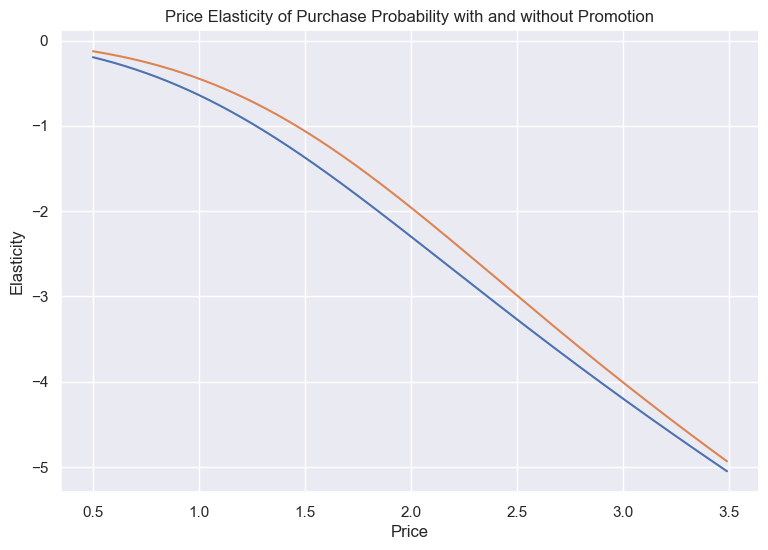

In [168]:
# visualrize purchase elasticities with and without promotion side by side for comprarisson.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

observe that the purchase probability elasticity of the customer is less elastic when there is promotion. 

people are more likely to buy a product if there is some promotional activity rather than purchase a product with the same price, when it isn't on promotion. 


### Cross Price Elasticity Brand 5, Cross Brand 4

In [169]:
# Here we are interested in determining the brand choice of the customer. 
# filter data, to include only purchase occasion, when a purchase has occured. 

brand_choice = df_pa[df_pa['Incidence'] == 1]

In [173]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [171]:
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,2,0,0,1,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,2,0,0,1,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,2,0,0,1,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,2,0,0,1,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,2,0,0,1,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,2,0,0,1,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,2,0,0,1,0


In [172]:
# Set Y = brand Our model will predict the brand.
Y = brand_choice['Brand']

In [174]:
# We predict based on the prices for the five brands.
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [175]:
# Brand Choice Model fit. set solver, specify the scheme to use in the multi-class senario
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [176]:
## here is coeffictients for the model. consist 5 brands and 5 features for the price. 
model_brand_choice.coef_

array([[-3.91597334,  0.65845501,  2.41766281,  0.70407193, -0.20212412],
       [ 1.27460798, -1.87985655, -0.21265817, -0.20634535,  0.58786721],
       [ 1.62421855,  0.56211898,  0.50098195,  1.03953444,  0.45281345],
       [ 0.57453175,  0.395586  , -1.40062327, -1.24624897,  0.24934623],
       [ 0.44261505,  0.26369655, -1.30536332, -0.29101204, -1.08790277]])

Create dataframe to store the value

In [177]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915973,0.658455,2.417663,0.704072,-0.202124
1,1.274608,-1.879857,-0.212658,-0.206345,0.587867
2,1.624219,0.562119,0.500982,1.039534,0.452813
3,0.574532,0.395586,-1.400623,-1.246249,0.249346
4,0.442615,0.263697,-1.305363,-0.291012,-1.087903


In [178]:
# transformations on the coefficients data frame to increase readability.
# transpose the data frame, to keep with the conventional representation of results.
# add labels for the columns and the index, represent the coefficients of the brands and prices

bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


Own brand effect/ Cros brand effect
brand the coefficient of brand one is negative for price_1 while the other tend to have the positive coefficient, the higher the price, the lower the purchase probability. On the other hand the more the price of the competitor brand increase, the higher the probability of the customer to switch to brand 1 would be.

### Own Price Elasticirt Brand 5

the effect of the price change to brand 5

In [179]:
# Calculate price elasticity of brand choice.
# Create a data frame with price columns, which our model will use to predict the brand choice probabilities.
# Observe the purchase probability of brand 5 base on changes in its own price
## ** Hince that brand 5 column contain the price range since we compare it to the othe brand

df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5


,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [180]:
# Brand Choice Model prediction. 
# Using sklearn with predict_proba method (Probability estimates)
# The returned estimates for all classes are ordered by the label of classes.)

predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [181]:
predict_brand_5

array([[0.03290793, 0.02177649, 0.00543787, 0.02988814, 0.90998957],
       [0.03316266, 0.02211911, 0.00551597, 0.03025579, 0.90894648],
       [0.03341888, 0.0224668 , 0.00559511, 0.03062751, 0.90789169],
       ...,
       [0.06881363, 0.47570291, 0.07953841, 0.23889329, 0.13705177],
       [0.06852801, 0.47748569, 0.07972874, 0.23897823, 0.13527933],
       [0.06824144, 0.47926018, 0.07991704, 0.23905572, 0.13352563]])

In [182]:
# Since, we are interested in the probability for the fifth brand we need to obtain the last column located on position 4,

pr_own_brand_5 = predict_brand_5[: ][:, 4]

E = beta * price *(1-Pr(purchase))

beta is the coefficient of brand 5

In [183]:
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


In [184]:
# We're interested in the price coefficient of Brand 5. (the last row )
# And the dependent variable from the multi nominal logistic regression so the value in the column Coef_Brand 5
# Therefore, the beta coefficient we require is that of the brand 5 coefficient and price 5. (-1.09)

# so beta = -1.09

beta5 = bc_coef.iloc[4, 4]

In [185]:
## Calculate the own purchase probability elasticity of Brand 5
## E = beta * price *(1-Pr(purchase))

own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [186]:
# Adding the price elasticities to our master data frame. 
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096369,-0.211202,-0.119093,-0.030928,-0.167987,-0.125731,-0.195642,-0.049056
1,0.51,-0.100436,-0.217773,-0.123276,-0.032695,-0.172909,-0.129847,-0.201763,-0.050617
2,0.52,-0.104630,-0.224452,-0.127553,-0.034548,-0.177903,-0.134042,-0.207986,-0.052207
3,0.53,-0.108954,-0.231239,-0.131923,-0.036492,-0.182967,-0.138317,-0.214313,-0.053827
4,0.54,-0.113411,-0.238135,-0.136391,-0.038531,-0.188102,-0.142673,-0.220744,-0.055478
...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012987,-5.051467,-5.679978,-12.535053,-4.021268,-4.861387,-4.983010,-3.231573
296,3.46,-8.038237,-5.068322,-5.700133,-12.571953,-4.036134,-4.879588,-4.999916,-3.247767
297,3.47,-8.063453,-5.085159,-5.720251,-12.608836,-4.050984,-4.897759,-5.016802,-3.263929
298,3.48,-8.088636,-5.101976,-5.740333,-12.645702,-4.065817,-4.915899,-5.033668,-3.280058


Visualize the elsticities of Brand 5 across the different price point

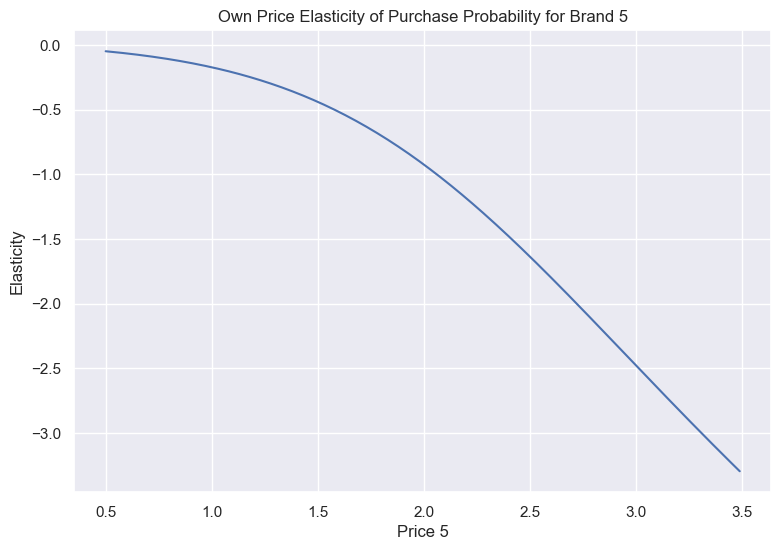

In [189]:
plt.figure(figsize= (9,6))
plt.plot(price_range, own_price_elasticity_brand_5)
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5');

## Cross Price Elasticity Brand 5, Cross Brand 4

What would the purchase probability of brand 5 change if the competitor brand changed their price?


lets examine the relationship of brand 5 and competitor, choose any remain brand as wanted
in this case choose brand 4 since brand 5 is the most ecxpensive and assume that it is the heighest quality so choose the brand that close to brand 5 which is brand 4, and it make the most sence to compare these two.

#### Determine the cross elasticity of brand 5 with respect to brand 4 

In [190]:
# We want to examine the effect of the changes in price of a competitor brand.
# the brand which comes closest to our own brand is brand 4. 
# examine changes in the price of brand 4.
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()
df_brand5_cross_brand4

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,3.45,2.654296
296,1.384559,1.764717,2.006694,3.46,2.654296
297,1.384559,1.764717,2.006694,3.47,2.654296
298,1.384559,1.764717,2.006694,3.48,2.654296


In [191]:
# Brand Choice Model prediction. 
# Using sklearn with predict_proba method (Probability estimates)
# The returned estimates for all classes are ordered by the label of classes.)

predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)
predict_brand5_cross_brand4

array([[0.00996345, 0.16384112, 0.00386814, 0.60919502, 0.21313228],
       [0.01011875, 0.16488699, 0.00394163, 0.60674135, 0.21431127],
       [0.0102762 , 0.16593508, 0.00401642, 0.60428131, 0.21549099],
       ...,
       [0.22460007, 0.24723916, 0.23615648, 0.04189153, 0.25011276],
       [0.22566809, 0.24616349, 0.23807678, 0.04127778, 0.24881385],
       [0.22673188, 0.24508243, 0.24000283, 0.04067136, 0.2475115 ]])

In [195]:
# As now we're interested in what the probability of choosing the competitor brand is,
# select the purchase probability for brand 4, contained in the 4th column with index 3. 

# probability choosing brand 4
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [198]:
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


In [199]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [200]:
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [202]:
# Cross Price Elasticity = -(beta : negative of own price coeff) * price range(cross brand) *Pr(purchase probability cross brand)
# different fomular
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4


In [203]:
# Update price elasticities data frame to include the cross price elasticities for brand 5 with respect to brand 4.
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096369,-0.211202,-0.119093,-0.030928,-0.167987,-0.125731,-0.195642,-0.049056,0.332011
1,0.51,-0.100436,-0.217773,-0.123276,-0.032695,-0.172909,-0.129847,-0.201763,-0.050617,0.337288
2,0.52,-0.104630,-0.224452,-0.127553,-0.034548,-0.177903,-0.134042,-0.207986,-0.052207,0.342507
3,0.53,-0.108954,-0.231239,-0.131923,-0.036492,-0.182967,-0.138317,-0.214313,-0.053827,0.347669
4,0.54,-0.113411,-0.238135,-0.136391,-0.038531,-0.188102,-0.142673,-0.220744,-0.055478,0.352773
...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012987,-5.051467,-5.679978,-12.535053,-4.021268,-4.861387,-4.983010,-3.231573,0.162233
296,3.46,-8.038237,-5.068322,-5.700133,-12.571953,-4.036134,-4.879588,-4.999916,-3.247767,0.160332
297,3.47,-8.063453,-5.085159,-5.720251,-12.608836,-4.050984,-4.897759,-5.016802,-3.263929,0.158446
298,3.48,-8.088636,-5.101976,-5.740333,-12.645702,-4.065817,-4.915899,-5.033668,-3.280058,0.156575


Visualize the probability of cross price elasticity for brand 5 with respect to brand 4

Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

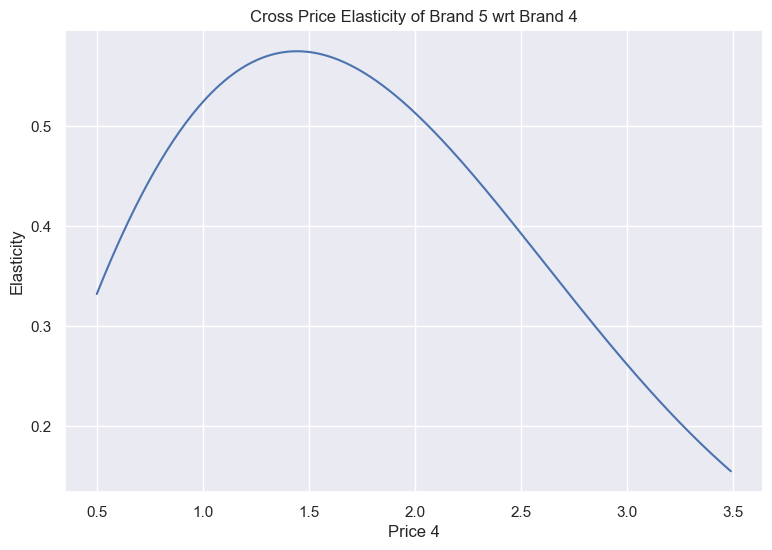

In [205]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity)
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

notice that the elasticties are positive across the price range, this indicate that if brand 4 increase the price then it would lead to the purchase prbability for brand 5 is increase, in other wprd of the competitor increase their price then the customer tend to buy our product more.

If the cross price elasticitt is positive it means that the 2 product is consider as subtitutes for one another

If the cross price elasticity at some price point is greater in absolute terms than own price elasticity the alternative brand is consider as strong subsitute product

Is brand 4 is strong subsitute for brand 5?

this depends on the price point, for this case brand 4 is strong subsitute for brand 5 for all price up to 1.65 USD but it out of price range of brand 4 (price range 1.76 - 2.26),   
so if brand 4 lower their price it would be very strong competitor to brand 5

we can conclude that the purchase probability of brand 5 is still increase since the cross price elasicity is positive weather the increase in price of prand 4, the market strategies of brand 5 would be focus on the customer that choose to buy brand 4 at first the attract them to buy brand 5
recall from the purchase analytics the well-off segment which favor to purchase the chocolate form brand 4 would be the traget customer for brand 5 marketing since 60% of the customer segemnt buy product from brand 4 but only 20% of them choose to purchase brand 5

## Own and Cross-Price Elasticity by Segment

### Well-off segement 

analysing the purchase probability for choosing brand 5 by wel off segments.

since the well-off segment has strong preference for brand 4, it should be interesting to observe the customer behaiour with respect to the price change in brand 4

In [212]:
df_pa.head(5)

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,47,1,110866,1,0,2,0,0,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,47,1,110866,1,0,2,0,0,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,47,1,110866,1,0,2,0,0,1,0


In [209]:
# filter our data to contain only purchase incidences of the third segment - Well-off.
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [213]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


### Own-Brand Price Elasticity

In [215]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

In [217]:
pr_own_brand_5_s3_test = predict_own_brand_5_s3[: , 4]
pr_own_brand_5_s3_test
own_price_elasticity_brand_5_s3_test =  beta5 * price_range * (1 - pr_own_brand_5_s3_test)

### Cross Brand Price Elassticity

In [219]:
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Update master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096369,-0.211202,-0.119093,-0.030928,-0.167987,-0.125731,-0.195642,-0.049056,0.332011,-0.297314,0.482421
1,0.51,-0.100436,-0.217773,-0.123276,-0.032695,-0.172909,-0.129847,-0.201763,-0.050617,0.337288,-0.303361,0.491726
2,0.52,-0.104630,-0.224452,-0.127553,-0.034548,-0.177903,-0.134042,-0.207986,-0.052207,0.342507,-0.309417,0.501016
3,0.53,-0.108954,-0.231239,-0.131923,-0.036492,-0.182967,-0.138317,-0.214313,-0.053827,0.347669,-0.315484,0.510290
4,0.54,-0.113411,-0.238135,-0.136391,-0.038531,-0.188102,-0.142673,-0.220744,-0.055478,0.352773,-0.321562,0.519548
...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012987,-5.051467,-5.679978,-12.535053,-4.021268,-4.861387,-4.983010,-3.231573,0.162233,-3.337317,0.157474
296,3.46,-8.038237,-5.068322,-5.700133,-12.571953,-4.036134,-4.879588,-4.999916,-3.247767,0.160332,-3.350647,0.152053
297,3.47,-8.063453,-5.085159,-5.720251,-12.608836,-4.050984,-4.897759,-5.016802,-3.263929,0.158446,-3.363974,0.146797
298,3.48,-8.088636,-5.101976,-5.740333,-12.645702,-4.065817,-4.915899,-5.033668,-3.280058,0.156575,-3.377298,0.141702


Visualize data

In [214]:
import matplotlib.axes as axs

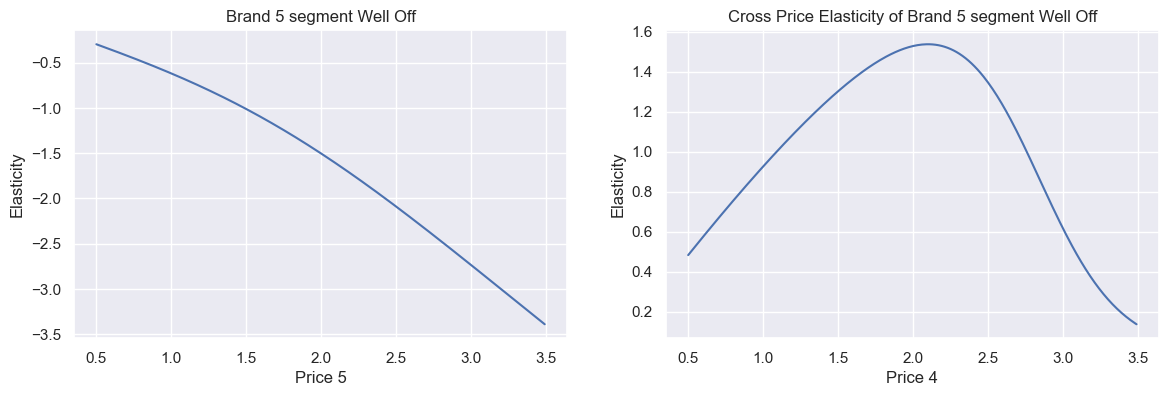

In [225]:
fig, axs = plt.subplots(1,2, figsize = (14,4))

axs[0].plot(price_range, own_price_elasticity_brand_5_s3)
axs[0].set_title('Brand 5 segment Well Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3)
axs[1].set_title('Cross Price Elasticity of Brand 5 segment Well Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

the first figure refers to the changes in price of brand 5, the second one refer to the changes in the price of brand 4, the actual domain of price range of brand 5 is form 2.1 to 2.8 where as brand 4 price range is in the range of 1.76 to 2.26. The well off customer i elastic to own brand (seem to prefer brand 4) as show in te heat map at 60% purchase brand 4

in cross price elasticity, the value is positive indicating that for the well-off segement brand 4 is the subsitute for brand 5.  

In [ ]:
#  see the turning point (inelasticity ) of segment 2 
df_price_elasticities[['Price_Point','PE_Segment_0']][(df_price_elasticities['PE_Segment_0'] > -1.1) &
                                                      (df_price_elasticities['PE_Segment_0'] < -0.95)]

In [236]:
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096369,-0.211202,-0.119093,-0.030928,-0.167987,-0.125731,-0.195642,-0.049056,0.332011,-0.297314,0.482421
1,0.51,-0.100436,-0.217773,-0.123276,-0.032695,-0.172909,-0.129847,-0.201763,-0.050617,0.337288,-0.303361,0.491726
2,0.52,-0.104630,-0.224452,-0.127553,-0.034548,-0.177903,-0.134042,-0.207986,-0.052207,0.342507,-0.309417,0.501016
3,0.53,-0.108954,-0.231239,-0.131923,-0.036492,-0.182967,-0.138317,-0.214313,-0.053827,0.347669,-0.315484,0.510290
4,0.54,-0.113411,-0.238135,-0.136391,-0.038531,-0.188102,-0.142673,-0.220744,-0.055478,0.352773,-0.321562,0.519548
...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012987,-5.051467,-5.679978,-12.535053,-4.021268,-4.861387,-4.983010,-3.231573,0.162233,-3.337317,0.157474
296,3.46,-8.038237,-5.068322,-5.700133,-12.571953,-4.036134,-4.879588,-4.999916,-3.247767,0.160332,-3.350647,0.152053
297,3.47,-8.063453,-5.085159,-5.720251,-12.608836,-4.050984,-4.897759,-5.016802,-3.263929,0.158446,-3.363974,0.146797
298,3.48,-8.088636,-5.101976,-5.740333,-12.645702,-4.065817,-4.915899,-5.033668,-3.280058,0.156575,-3.377298,0.141702


In [246]:
df_price_elasticities[['Price_Point','Brand 5 S3','Brand_5_Cross_Brand_4_S3']][(df_price_elasticities['Price_Point'] > 1.95) &
                                                                               (df_price_elasticities['Price_Point'] < 2.45)]

,Price_Point,Brand 5 S3,Brand_5_Cross_Brand_4_S3
145,1.95,-1.451698,1.517230
146,1.96,-1.462382,1.519622
147,1.97,-1.473106,1.521871
148,1.98,-1.483869,1.523975
149,1.99,-1.494671,1.525928
150,2.00,-1.505511,1.527729
151,2.01,-1.516390,1.529375
152,2.02,-1.527307,1.530860
153,2.03,-1.538262,1.532184
154,2.04,-1.549255,1.533340


if brand 5 cost 2.4$ the brand price elasticity is -1.968157, more over where as brand 4 cost 2$ so the coss price elasticity is about 1.527729,

if brand 4 lower the price by 1% then the purchase probability of prand 5 would fall by 1.5%
and if bran 5 lower teir own price by 1%, own price elasticity so it would increase 1.96% in purchase probability of brand 5 itself. so to ensure the market share when brand 4 lower their price by 1%, brand 5 should decrease price by 0.75% since the cross price elasticity of brand 5 to brand 4 at the price of 2$ is 1.52% (x*2 = 1.52, x is decrease in price that required to  reach the 1.52% in purchase probability so x = 0.75) theoretically the market share bewtween these 2 brand from well off segment not going to change.

### Standard Segment

In [247]:
# Here we are interesting in analysing the brand choice probability of the Standard segment.
# We filter our data, by selecting only purchases from segment 0.
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
2398,200000024,44,1,2,2,0,0,1.35,1.58,1.97,...,32,1,88428,0,0,0,1,0,0,0
2403,200000024,98,1,2,2,0,0,1.47,1.90,1.95,...,32,1,88428,0,0,0,1,0,0,0
2408,200000024,143,1,2,3,0,0,1.21,1.35,1.99,...,32,1,88428,0,0,0,1,0,0,0
2410,200000024,162,1,2,5,0,0,1.39,1.90,1.94,...,32,1,88428,0,0,0,1,0,0,0
2417,200000024,217,1,5,1,0,0,1.34,1.89,1.99,...,32,1,88428,0,0,0,1,0,0,0


In [248]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### Own Brand elasticity std seg

In [249]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Compute price elasticities and update master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### Cross Brand Elasicity std seg

In [250]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Compute price elasticities and update master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

### Career-Focused Segment

In [251]:
# Filter data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [252]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### Own Brand elasticity career focus

In [253]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### Cross-Brand Price Elasticity career focus

In [255]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

### Fewer Opputunitues

In [256]:
# Filter data, select only purchases from segment 2, which is the Fewer-Opportunities segment.
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [257]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### Own-Brand Price Elasticity Fewer opp

In [258]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-opportunities segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

Cross brand Price Elasticity fewer opp

In [259]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-opportunities segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096369,-0.211202,-0.119093,-0.030928,-0.167987,-0.125731,-0.195642,-0.049056,0.332011,-0.115837,0.174125,-0.043941,0.194772,-0.001036,0.181599,-0.297314,0.482421
1,0.51,-0.100436,-0.217773,-0.123276,-0.032695,-0.172909,-0.129847,-0.201763,-0.050617,0.337288,-0.118876,0.176180,-0.045027,0.197256,-0.001098,0.183896,-0.303361,0.491726
2,0.52,-0.104630,-0.224452,-0.127553,-0.034548,-0.177903,-0.134042,-0.207986,-0.052207,0.342507,-0.121950,0.178185,-0.046123,0.199689,-0.001163,0.186144,-0.309417,0.501016
3,0.53,-0.108954,-0.231239,-0.131923,-0.036492,-0.182967,-0.138317,-0.214313,-0.053827,0.347669,-0.125059,0.180139,-0.047229,0.202072,-0.001231,0.188343,-0.315484,0.510290
4,0.54,-0.113411,-0.238135,-0.136391,-0.038531,-0.188102,-0.142673,-0.220744,-0.055478,0.352773,-0.128204,0.182042,-0.048344,0.204404,-0.001303,0.190494,-0.321562,0.519548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012987,-5.051467,-5.679978,-12.535053,-4.021268,-4.861387,-4.983010,-3.231573,0.162233,-3.592456,0.024052,-1.287427,0.068592,-3.746081,0.023406,-3.337317,0.157474
296,3.46,-8.038237,-5.068322,-5.700133,-12.571953,-4.036134,-4.879588,-4.999916,-3.247767,0.160332,-3.606361,0.023695,-1.297236,0.067969,-3.757523,0.022946,-3.350647,0.152053
297,3.47,-8.063453,-5.085159,-5.720251,-12.608836,-4.050984,-4.897759,-5.016802,-3.263929,0.158446,-3.620221,0.023344,-1.307101,0.067350,-3.768945,0.022493,-3.363974,0.146797
298,3.48,-8.088636,-5.101976,-5.740333,-12.645702,-4.065817,-4.915899,-5.033668,-3.280058,0.156575,-3.634037,0.022996,-1.317020,0.066736,-3.780347,0.022047,-3.377298,0.141702


Text(0.5, 0, 'Price 4')

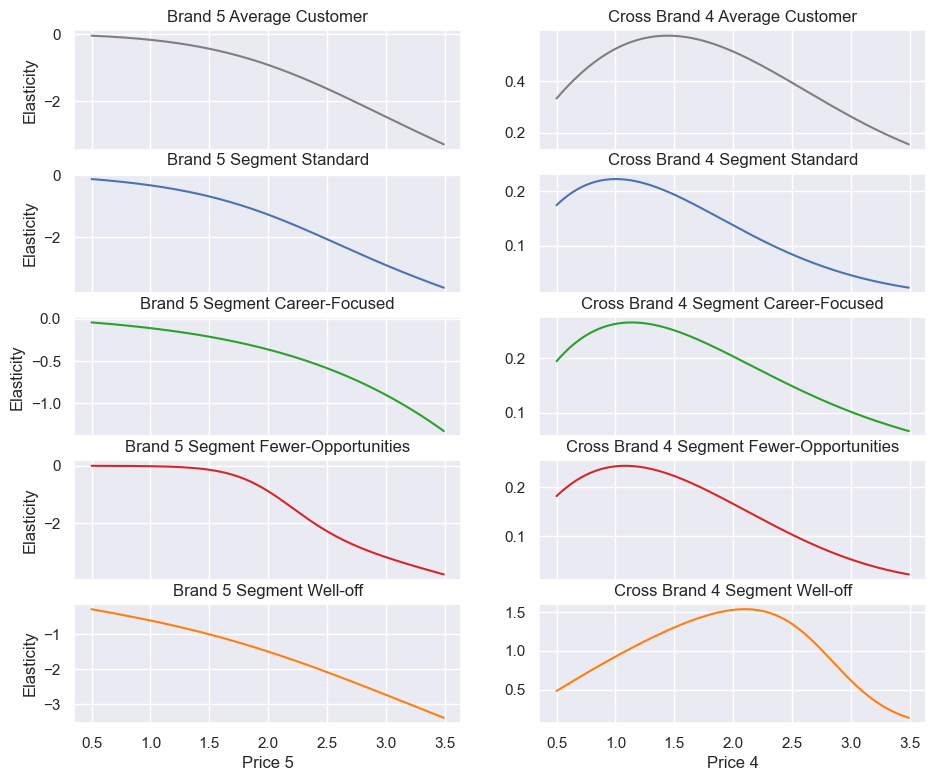

In [261]:
# We plot the own and cross brand price elasticities for the average customer and each of the four segments.
# We can observe differences and similiraties between the segments and examine their preference, when it comes to brand choice.
# The two segments, which seem to be of most interested for the marketing team of brand 5, seem to be the Career-focused
# and the Well-off. They are also the segments which purchase this brand most often. 
# The Career-focused segment is the most inelastic and they are the most loyal segment. 
# Based on our model, they do not seem to be that affected by price, therefore brand 5 could increase its price, 
# without fear of significant loss of customers from this segment. 
# The Well-off segment on the other hand, seems to be more elastic. They also purchase the competitor brand 4 most often.
# In order to target this segment, our analysis signals, that price needs to be decreased. However, keep in mind 
# that other factors aside from price might be influencing the purchase behaivour of this segment.

fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0)
ax2[0].set_title('Brand 5 Segment Standard')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0)
ax2[1].set_title('Cross Brand 4 Segment Standard')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:green')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:green')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:red')
ax4[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:red')
ax4[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:orange')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:orange')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

Brand choice analysis

Standard segment is more elastic when compare to the average and in the price range of 2.1 to 2.8 the elasticity of the standard segemnt id between -1.4 to -2.7, the purchase probability of the brand 5 is elastic for the entire observe price range so for the marketing is better to lower the price within price range to increase the purchase probability for the standard segment

Moving on to the career focus segement, looking at the graph it definitely least elastic among the rest and this segment is not relly affected by the increasing in price of the brand 5. MOre over the cross price elasticity is low value, this mean that it most unlikely to switch to the competitor brand, so the marketing strategy might be increasing price of brand 5 but still not losing too much customer from tis segment    

Fewer Opportunities, the curve from elasticity graph is differr from the other segment. this segment seems to be inelastic at the lower price point and then it become more elastic customer at thehigher prices. In term of the cross price own price elastic is in the same range of the career focus this could come from the fact that for this group of segment is most unlikely for them to purchase brand 4 or and brand 5 which has a value less than 1% in both brand. To get rid of this problem it might need to obtain more purchase data from this segment or the product might be pricey for this segment, so this segment might not be the traget group of the marketing for brand 4 and 5.

According from the heat map it appears that career focus and well off segment is the real traget group for Brand 4 and Brand 5 because they are most of the people who purchase Brand 4 and 5 

Well-offsegment is much more elastic than the areer focus therefore if increasse price for brand 5 it would barely affect the career focus segement but it would be affect seriously for the well-off segment. If the price of Brand 5 is decrease it would benefit due to the gaining in market share from the well-off segment and still retain the career focus segement



